# Pymaceuticals Inc.
---

### Observations

1. There is a postitive correlation between the weight of the mice and the tumor size. The P-Value of .84 indicates this linear correlation. Therefore, we might want to keep the mice on a healthy diet and provide exercise to help them decrease tumor size.
2. Capomulin seems to be an effective drug regimen to treat the cancer. The tumor size in mouse l509 decreased as time went on.
3. Of the 4 drug regimens we analyized, Capomulin and Ramicane were the most effective at decreasing tumor size. The least effective were the other two drugs Infubinol and Ceftamin. Therefore, I would recommend we do further studies or advance the two effective drugs to the next stage of trials.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_metadata.head()

mouse_study_complete = pd.merge( study_results,mouse_metadata, on=["Mouse ID"])
mouse_study_complete.head()
# Display the data table for preview


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
len(mouse_study_complete['Mouse ID'].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice = mouse_study_complete[mouse_study_complete.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]
duplicated_mice['Mouse ID'].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mice_df = mouse_study_complete[mouse_study_complete['Mouse ID'] == 'g989']
duplicated_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_complete = mouse_study_complete.drop(duplicated_mice_df.index)

In [6]:
# Checking the number of mice in the clean DataFrame.
len(mouse_study_complete['Mouse ID'].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mean_volume = mouse_study_complete.groupby('Drug Regimen').mean()
median_volume = mouse_study_complete.groupby('Drug Regimen').median()
var_volume = mouse_study_complete.groupby('Drug Regimen').var()
stddev_volume = mouse_study_complete.groupby('Drug Regimen').std()
sem_volume = mouse_study_complete.groupby('Drug Regimen').sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


mean_volume_df = mean_volume["Tumor Volume (mm3)"]
median_volume_df = median_volume["Tumor Volume (mm3)"]
var_volume_df = var_volume["Tumor Volume (mm3)"]
stddev_volume_df = stddev_volume["Tumor Volume (mm3)"]
sem_volume_df = sem_volume["Tumor Volume (mm3)"]

summary_stat_df = pd.concat([mean_volume_df,median_volume_df,var_volume_df,stddev_volume_df,sem_volume_df], axis=1)
summary_stat_df.columns=["Mean Tumor Volume","Median Tumor Volume","Tumor Volume Variance","Tumor Volume Std. Dev.","Tumor Volume Std. Err."]
summary_stat_df

# summary_stat_df.set_index('Drug Regimen')
# summary_stat_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

agg_func_math = {'Tumor Volume (mm3)': [ 'mean', 'median', 'var','std', 'sem'] }
summary_stat_agg_df = mouse_study_complete.groupby(['Drug Regimen']).agg(agg_func_math)
summary_stat_agg_df


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

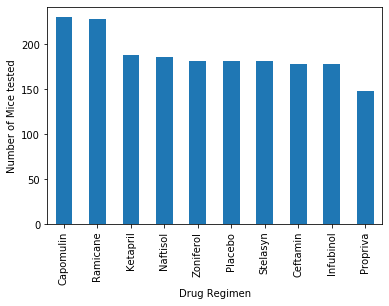

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
#mouse_study_complete.plot(kind="bar",x="Drug Regimen",y="Timepoint")
drug_regimen_mouse_df = pd.DataFrame(mouse_study_complete.groupby('Drug Regimen').size())
drug_regimen_mouse_df = drug_regimen_mouse_df.sort_values(0, ascending=False)
bargraph = drug_regimen_mouse_df.plot(kind="bar",legend=False) 
bargraph.set_ylabel("Number of Mice tested")
plt.show()

Text(0, 0.5, 'Number of Mice tested')

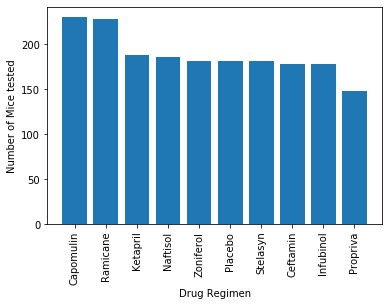

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(drug_regimen_mouse_df.index,drug_regimen_mouse_df[0])
plt.xticks(rotation=90)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice tested')

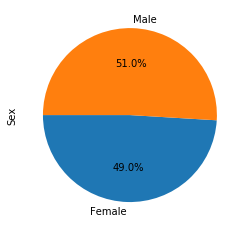

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_mouse_df = mouse_study_complete.groupby('Sex').size()
plot = gender_mouse_df.plot.pie(y='Sex',autopct='%1.1f%%',startangle=180, label='Sex')

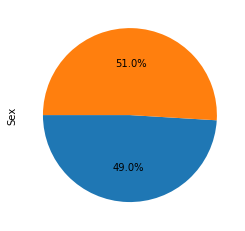

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_mouse_df,autopct='%1.1f%%',startangle=180,)
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_tm = mouse_study_complete.groupby(['Mouse ID'])['Timepoint'].max()
last_tm_df = pd.DataFrame(last_tm) # turned it into a dataframe for merging
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# merging "on" Mouse ID and Timepoint, "how" on RIGHT so that it only records the MAX timepoints
last_df = pd.merge(mouse_study_complete, last_tm_df, on=('Mouse ID', 'Timepoint'), how='right')
last_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,35,71.905117,0,Ketapril,Female,2,29
3,a457,10,49.783419,0,Ketapril,Female,11,30
4,c819,40,62.175705,1,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
243,t565,45,34.455298,0,Capomulin,Female,20,17
244,i557,45,47.685963,1,Capomulin,Female,1,24
245,m957,45,33.329098,1,Capomulin,Female,3,19
246,f966,20,30.485985,0,Capomulin,Male,16,17


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_cap = []
tumor_ram = []
tumor_inf = []
tumor_cef = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for index, row in last_df.iterrows():
    if row["Drug Regimen"] == 'Capomulin':
        tumor_cap.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[1]:
        tumor_ram.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[2]:
        tumor_inf.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[3]:
        tumor_cef.append(row['Tumor Volume (mm3)'])
    
    # add subset 
#created a data frame with the tumor data of the drugs listed.
drug_df = pd.DataFrame({"Capomulin": tumor_cap,
                       treatments[1]: tumor_ram,
                       treatments[2]: tumor_inf,
                       treatments[3]: tumor_cef
                       })
    
    # Determine outliers using upper and lower bounds
drug_df_max = drug_df.max()
drug_df_min = drug_df.min()
# drug_df2 = pd.merge(drug_df_min, drug_df_max)
drug_df
    

,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,38.342008,36.321346,61.386660
1,38.753265,36.561652,72.226731,46.784535
2,32.377357,31.560470,46.250112,64.299830
3,23.343598,38.407618,57.031862,48.722078
4,38.939633,43.047543,67.685569,57.918381
5,28.484033,37.311236,66.196912,55.742829
6,41.483008,36.134852,62.117279,67.748662
7,40.728578,44.183451,55.629428,64.729837
8,46.539206,22.050126,62.754451,68.594745
9,31.023923,33.397653,65.525743,59.851956


In [16]:
by_mouse = mouse_study_complete.groupby(["Mouse ID"]).max()
by_mouse_reset = by_mouse.reset_index()

merged_data = by_mouse_reset[['Mouse ID','Timepoint']].\
    merge(mouse_study_complete,on=['Mouse ID','Timepoint'],how="left")

def get_outliers(regimen):
    regimen_data = mouse_study_complete.loc[mouse_study_complete["Drug Regimen"] == regimen]['Tumor Volume (mm3)']
    
    quartiles = regimen_data.quantile([.25,.5,.75])
    quart_first = quartiles[0.25]
    quart_last = quartiles[0.75]
    quart_range = quart_last - quart_first
    lower_bound = quart_first - (1.5 * quart_range)
    upper_bound = quart_last + (1.5 * quart_range)

    outliers = regimen_data.loc[(regimen_data < lower_bound) | (regimen_data > upper_bound)]
    print(f"{regimen}'s potential outliers:{outliers}")
    return regimen_data
    
cap = get_outliers("Capomulin")
ram = get_outliers("Ramicane")
inf = get_outliers("Infubinol")
ceft = get_outliers("Ceftamin")

Capomulin's potential outliers:1699    25.472143
1700    23.343598
Name: Tumor Volume (mm3), dtype: float64
Ramicane's potential outliers:514    22.050126
Name: Tumor Volume (mm3), dtype: float64
Infubinol's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)


In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
   # Determine outliers using upper and lower bounds
        # Could this be done with a for loop?
#calculations of quartile, quantile, etc for each of the drugs
quart_cap = drug_df[treatments[0]].quantile([.25, .5, .75])
low_cap = quart_cap[.25]
med_cap = quart_cap[.5]
up_cap = quart_cap[.75]
iqr_cap = up_cap-low_cap
lowb_cap = low_cap - (1.5*iqr_cap)
upb_cap = up_cap + (1.5*iqr_cap)
max_cap = drug_df[treatments[0]].max()
min_cap = drug_df[treatments[0]].min()

quart_ram = drug_df['Ramicane'].quantile([.25, .5, .75])
low_ram = quart_ram[.25]
med_ram = quart_ram[.5]
up_ram = quart_ram[.75]
iqr_ram = up_ram-low_ram
lowb_ram = low_ram - (1.5*iqr_ram)
upb_ram = up_ram + (1.5*iqr_ram)
max_ram = drug_df[treatments[1]].max()
min_ram = drug_df[treatments[1]].min()

quart_inf = drug_df[treatments[2]].quantile([.25, .5, .75])
low_inf = quart_inf[.25]
med_inf = quart_inf[.5]
up_inf = quart_inf[.75]
iqr_inf = up_inf-low_inf
lowb_inf = low_inf - (1.5*iqr_inf)
upb_inf = up_inf + (1.5*iqr_inf)
max_inf = drug_df[treatments[2]].max()
min_inf = drug_df[treatments[2]].min()

quart_cef = drug_df[treatments[3]].quantile([.25, .5, .75])
low_cef = quart_cef[.25]
med_cef = quart_cef[.5]
up_cef = quart_cef[.75]
iqr_cef = up_cef-low_cef
lowb_cef = low_cef - (1.5*iqr_cef)
upb_cef = up_cef + (1.5*iqr_cef)
max_cef = drug_df[treatments[3]].max()
min_cef = drug_df[treatments[3]].min()

outliers = pd.DataFrame({'Drug': treatments,
                         'Lower Quartile':[low_cap, low_ram, low_inf, low_cef],
                         'Upper Quartile':[up_cap, up_ram, up_inf, up_cef],
                         'IQR':[iqr_cap, iqr_ram, iqr_inf, iqr_cef],
                         'Median':[med_cap, med_ram, med_inf, med_cef],
                        'Upper Bound': [upb_cap, upb_ram, upb_inf, upb_cef],
                        'Lower Bound': [lowb_cap, lowb_ram, lowb_inf, lowb_cef],
                        'Max': [max_cap, max_ram, max_inf, max_cef],
                         'Min': [min_cap, min_ram, min_inf, min_cef]
                        })
outliers
outliers_group = outliers.groupby('Drug')
outliers_group.sum()


,Lower Quartile,Upper Quartile,IQR,Median,Upper Bound,Lower Bound,Max,Min
Drug,,,,,,,,
Capomulin,32.377357,40.159220,7.781863,38.125164,51.832015,20.704562,47.685963,23.343598
Ceftamin,48.722078,64.299830,15.577752,59.851956,87.666458,25.355450,68.923185,45.000000
Infubinol,54.048608,65.525743,11.477135,60.165180,82.741446,36.832905,72.226731,36.321346
Ramicane,31.560470,40.659006,9.098537,36.561652,54.306811,17.912664,45.220869,22.050126


## Line and Scatter Plots

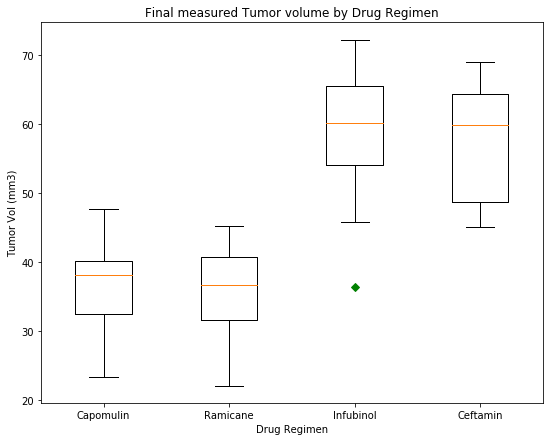

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Created a list to use for the boxplot. Each one list is a list of each drug tumor data. 
boxplot_list = [drug_df[treatments[0]],
                drug_df[treatments[1]],
                drug_df[treatments[2]],
                drug_df[treatments[3]]
               ]
# used plt.subplots to define size
fig1, ax = plt.subplots(figsize=(9,7))
ax.set_title('Final measured Tumor volume by Drug Regimen') #set title
ax.set_xlabel('Drug Regimen') # set x label
ax.set_ylabel('Tumor Vol (mm3)') #set y lable
# used ax.boxplot function and ran the parameter boxplot_list to create the boxplot
ax.boxplot(boxplot_list, 0, 'gD')
plt.xticks([1,2,3,4], treatments) # set labels of each boxplot
plt.savefig('boxplot')
plt.show()

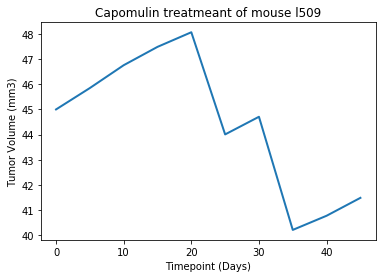

In [19]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# created a dataframe with specific mouse using the .loc() function and a boolean to find l509 data
line_df = mouse_study_complete.loc[mouse_study_complete["Mouse ID"] == "l509",:]
line_df
# defined the x axis list by calling the timepoints from the l509 dataframe
x_axisTP = line_df["Timepoint"] 
# defined the y axis or tumor size list by calling the tumor size from the dataframe
tumsiz = line_df["Tumor Volume (mm3)"] 

plt.title('Capomulin treatmeant of mouse l509') # created title
# the plot function plt.plot() with x and y values and customizations
plt.plot(x_axisTP, tumsiz,linewidth=2, markersize=12) 
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.savefig('linechart')
plt.show()

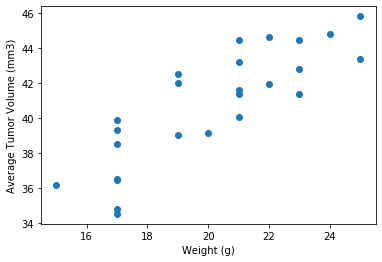

In [20]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# created dataframe using .loc() of the drug regimine Capomulin using a boolean
cap_df = mouse_study_complete.loc[mouse_study_complete["Drug Regimen"] == "Capomulin",:]
# use groupby() and mean() to create a dataframe
capavg = cap_df.groupby(['Mouse ID']).mean()
# created scatter plot of the x axis (weight) and the y axis (tumor size) by calling from the capavg dataframe
plt.scatter(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.savefig('scatterplot')
plt.show()

## Correlation and Regression

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# using the persons formula st.pearsonr() and used the capavg dataframe to pull the p value
# this is a linear value that says there's a high degree of correlation if the number is close to 1; 
# no correlation if close to 0; or a negative correlation if close to -1.
corr=round(st.pearsonr(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")

The correlation between mouse weight and average tumor volume is 0.84


In [22]:
# calculating linear regression values using st.linregress() function passing parameters from the capavg dataframe
(slope,intercept,rvalue,pvalue,stderr)=st.linregress(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
print(slope,intercept)

0.9544396890241047 21.55216053268501


In [ ]:
# ploting the regression line
# calculate the the linear line plot list of values
line = slope*(capavg['Weight (g)'])+intercept
# create the scatter plot like above
plt.scatter(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
# plot the linear regression line which is the averaged line of all the values in red
# i used the .format() function to create a label of the red line using the slope and intercept from above
plt.plot(capavg['Weight (g)'], line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')
# included legend with the redline slope formula using plt.legend()
plt.legend()
plt.savefig('linearregression')
plt.show()